In [242]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [243]:
df.shape

(5572, 5)

In [244]:
# Data Cleaning
# EDA
# Text preprocessing 
# Model Building
# Evaluation 
# Improvement 
# Website
# Deploy

# Data Cleaning

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [246]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [247]:
#dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [248]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [249]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [250]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [251]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [252]:
# check your duplicated values
df.duplicated().sum()

403

In [253]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [254]:
df.duplicated().sum()

0

In [255]:
df.shape

(5169, 2)

# EDA

In [256]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [257]:
df['target'].unique()

array([0, 1])

In [258]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

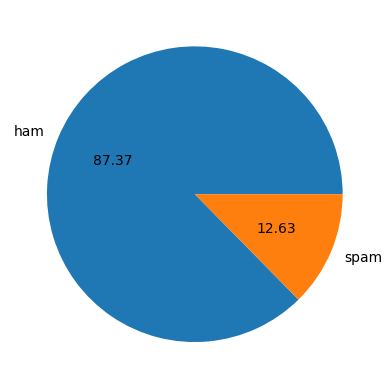

In [259]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [260]:
# data is imbalances

In [261]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [262]:
import nltk

In [263]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [264]:
# fetching number of characters in each instance
df['num_characters']=df['text'].apply(len)

In [265]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [266]:
# fetching number of words in each instance
# df['text'].apply(lambda x:nltk.word_tokenize(x))
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [267]:
# fetching number of words in each instance
# df['text'].apply(lambda x:nltk.sent_tokenize(x))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [268]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [269]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


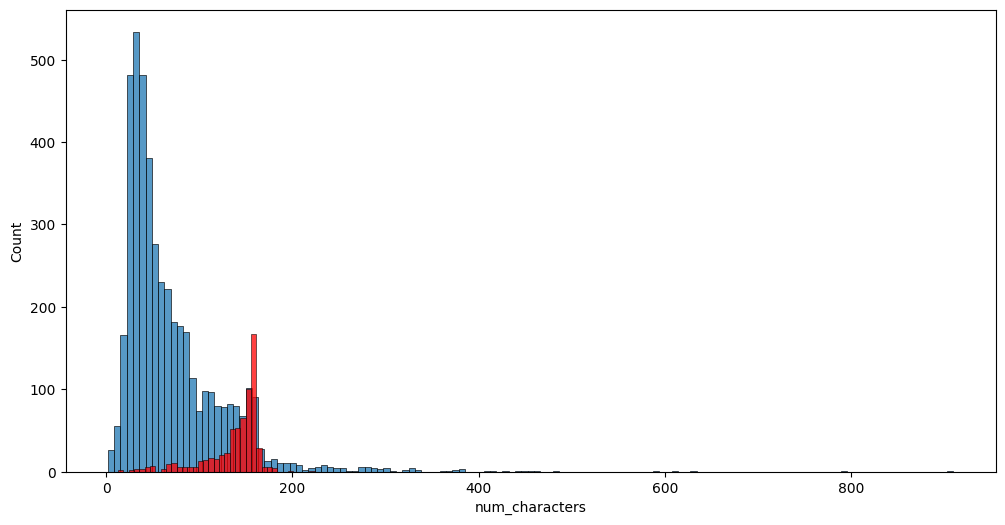

In [270]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

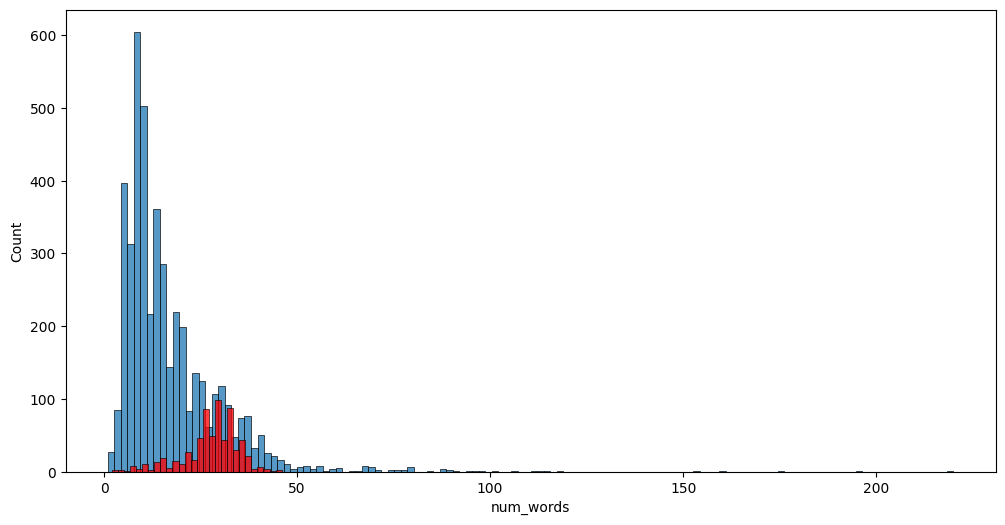

In [271]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

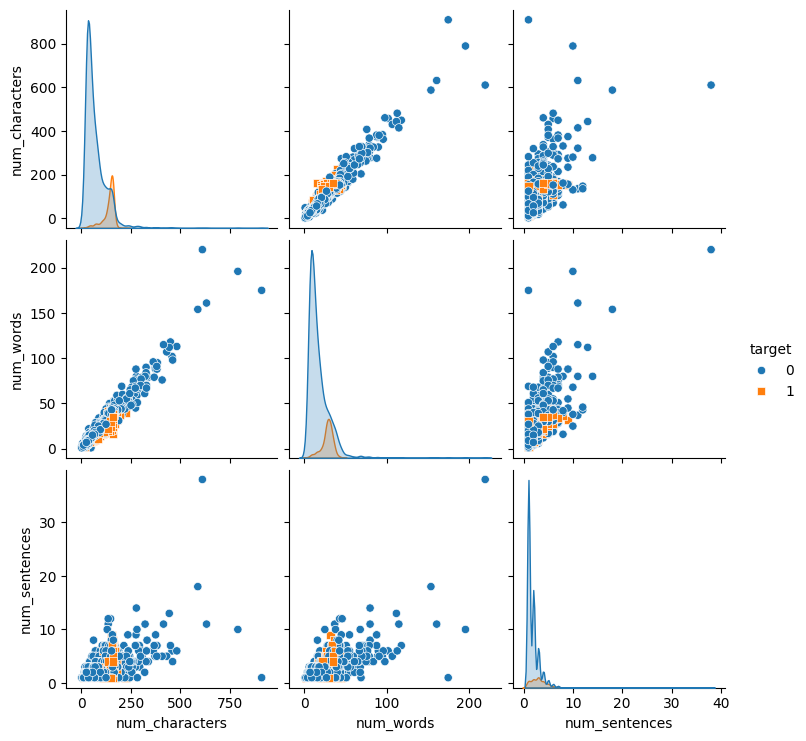

In [272]:
sns.pairplot(df, hue='target', markers=["o", "s"])
plt.show()

In [273]:
# constructing a Heat Map
# sns.heatmap(df.corr(),annot=True)

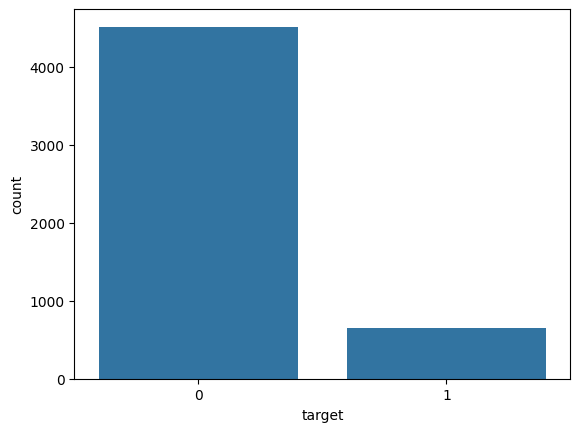

In [274]:
sns.countplot(x='target',data=df)
plt.show()

# Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing stop words and Punctuations
5. stemming

In [275]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [276]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [277]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [278]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [279]:
# creating wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

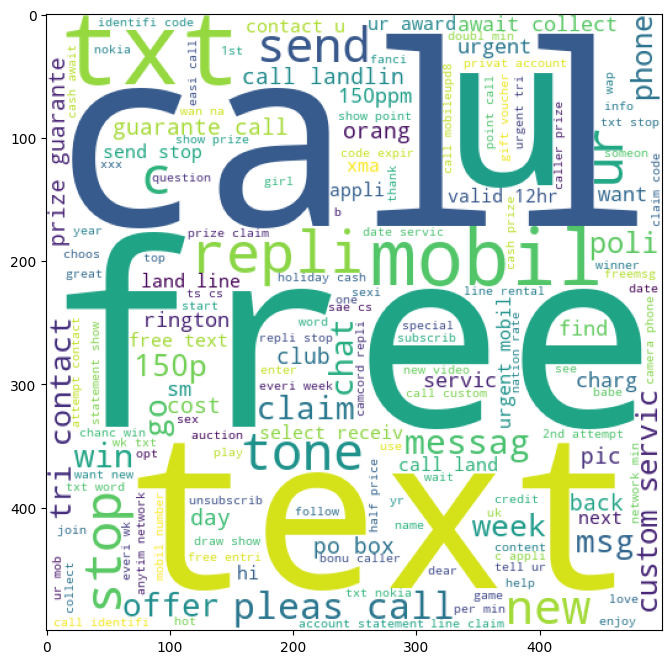

In [280]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

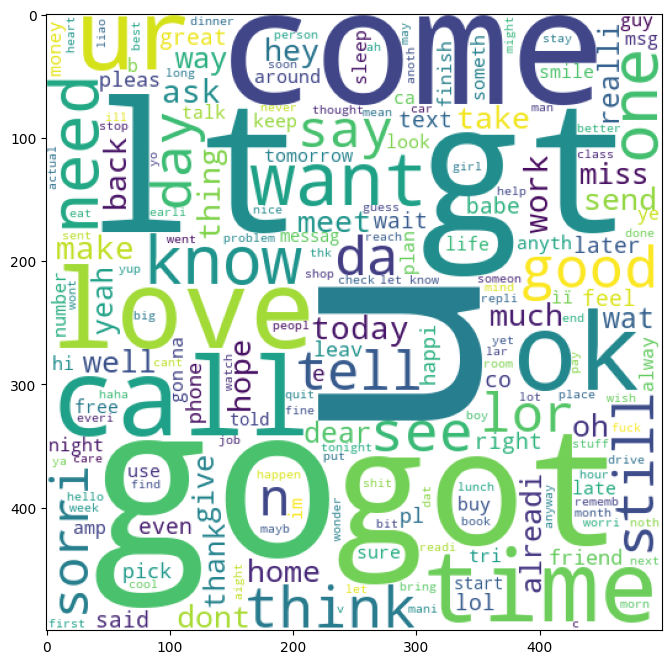

In [281]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [282]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [285]:
len(spam_corpus)

9939

In [283]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [297]:
len(ham_corpus)

35404

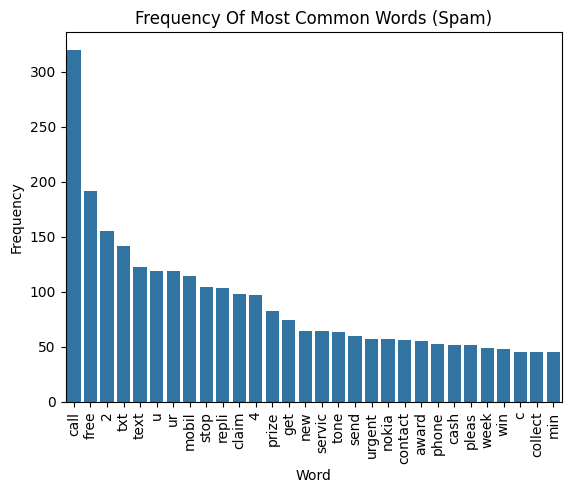

In [290]:
from collections import Counter
wordFreq_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Now, use seaborn's barplot with keyword arguments for x and y
sns.barplot(x=wordFreq_spam['Word'], y=wordFreq_spam['Frequency'])
plt.xticks(rotation='vertical')
plt.title("Frequency Of Most Common Words (Spam)")
plt.show()

In [287]:
wordFreq_spam.head()

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


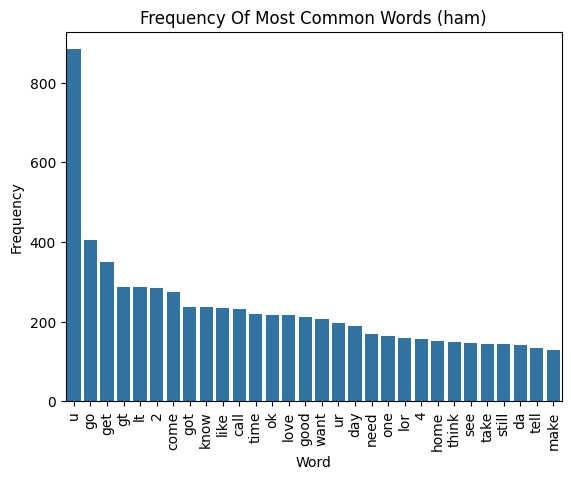

In [291]:
from collections import Counter
wordFreq_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
# Now, use seaborn's barplot with keyword arguments for x and y
sns.barplot(x=wordFreq_ham['Word'], y=wordFreq_ham['Frequency'])
plt.xticks(rotation='vertical')
plt.title("Frequency Of Most Common Words (ham)")
plt.show()


In [289]:
wordFreq_ham.head()

,Word,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


# Model Building

In [351]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


In [352]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [353]:
x.shape

(5169, 3000)

In [354]:
y=df['target'].values

In [355]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [357]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [358]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [359]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [360]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[773 121]
 [ 19 121]]
0.5


In [361]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   1]
 [ 19 121]]
0.9918032786885246


In [362]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[894   0]
 [ 32 108]]
1.0


In [363]:
#tfidf ---> mnb     

In [366]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
